# F. Data transformation (Feature Engineering)

#### F-1 Standardizing data types (Signup_date)

In [23]:
# Ensure datetime
patients_df['signup_date'] = pd.to_datetime(patients_df['signup_date'])
sessions_df['date'] = pd.to_datetime(sessions_df['date'])
interventions_df['sent_at'] = pd.to_datetime(interventions_df['sent_at'])

# Fix text casing
patients_df['gender'] = patients_df['gender'].str.title()
patients_df['insurance_type'] = patients_df['insurance_type'].str.title()


#### F-2 Binning (putting the age into categories)

In [24]:
import numpy as np
# Add age group column for segmentation
bins = [0, 18, 35, 55, np.inf]
labels = ['0-18', '19-35', '36-55', '55+']
patients_df['age_group'] = pd.cut(patients_df['age'], bins=bins, labels=labels)
patients_df.head(2)

,patient_id,age,gender,bmi,smoker,chronic_cond,injury_type,signup_date,referral_source,consent,clinic_id,insurance_type,age_group
0,172,66,Male,17.9,False,Diabetes,Shoulder,2024-12-15 00:12:44.286283,Self-Referral,True,1,Public,55+
1,173,70,Female,25.2,False,Diabetes,Hip,2024-07-03 00:12:44.286283,Self-Referral,True,1,Private-Top-Up,55+


F-3 : TASK 4 (Data Transformation)
- Log Transform (for highly skewed data e.g., income, prices)
- Encoding (Convert categorical variables into numerical format (e.g., One-Hot, Label Encoding))

In [25]:
# Check skewness
patients_df[['bmi']].skew()
sessions_df[['duration', 'pain_level', 'home_adherence_pc']].skew()


duration            -0.006262
pain_level           1.501890
home_adherence_pc   -0.117433
dtype: float64

In [26]:
patients_df[['bmi']].skew()

bmi    0.209401
dtype: float64

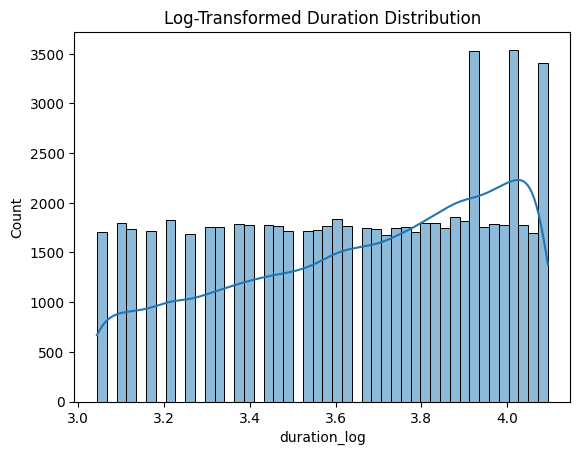

In [27]:
import numpy as np

# Add a small constant to avoid log(0)
sessions_df['duration_log'] = np.log1p(sessions_df['duration'])
sessions_df['home_adherence_log'] = np.log1p(sessions_df['home_adherence_pc'])

# Plot to see effect
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(sessions_df['duration_log'], kde=True)
plt.title("Log-Transformed Duration Distribution")
plt.show()


# G. Data Distribution 

#### G-1  Histograms for distributions of numerical features

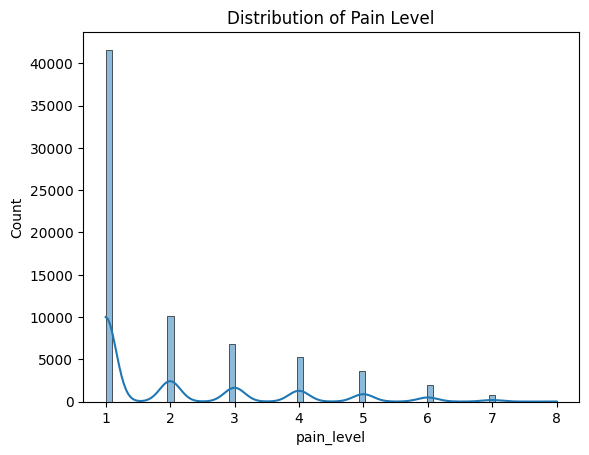

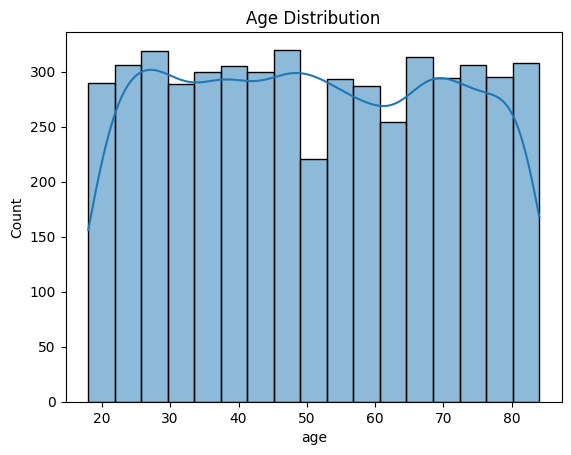

In [28]:

# Histogram for distribution of pain level
sns.histplot(sessions_df['pain_level'], kde=True)
plt.title('Distribution of Pain Level')
plt.show()

# Age distribution for patients (histogram)
sns.histplot(patients_df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

#### G-2  TASK 5 (Data Distribution)
- Boxplots to detect outliers & handle them.
- Pairplots to visualize relationships between multiple features.

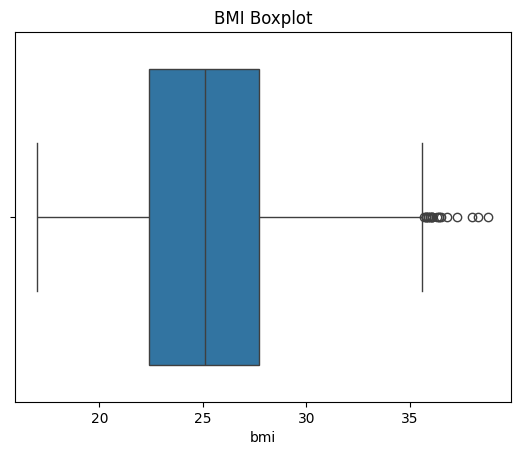

In [29]:
sns.boxplot(x=patients_df['bmi'])
plt.title("BMI Boxplot")
plt.show()

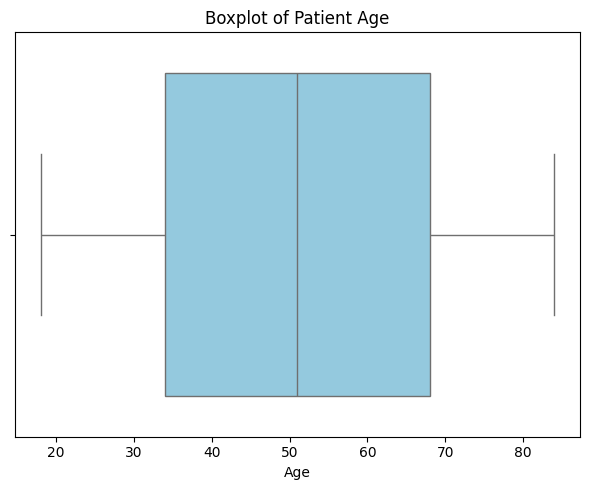

In [30]:
# Set plot style
plt.figure(figsize=(6, 5))
sns.boxplot(data=patients_df, x='age', color='skyblue')

# Add title and axis labels
plt.title("Boxplot of Patient Age")
plt.xlabel("Age")

# Show the plot
plt.tight_layout()
plt.show()


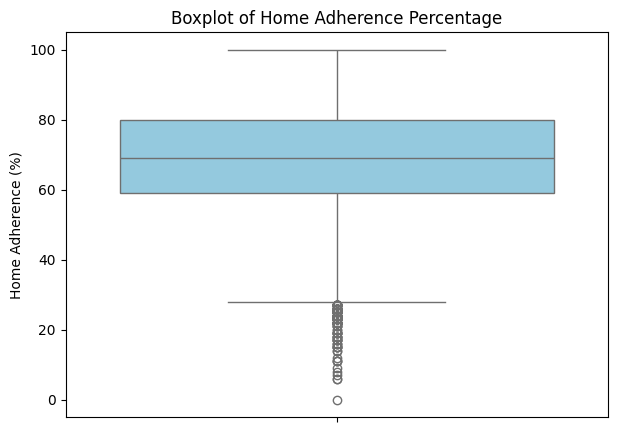

In [31]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=sessions_df, y='home_adherence_pc', color='skyblue')
plt.title("Boxplot of Home Adherence Percentage")
plt.ylabel("Home Adherence (%)")
plt.show()


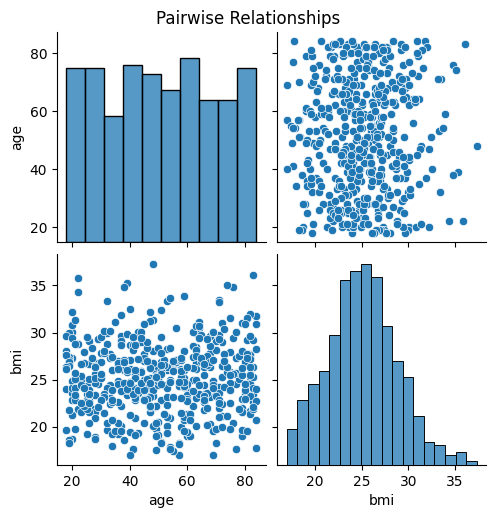

In [32]:
# Pairplot (Sampled for performance)

sns.pairplot(patients_df.sample(500)[['age', 'bmi', 'gender']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [33]:
sessions_df['exercise_type'].value_counts()


exercise_type
Ultrasound        11849
Manual Therapy    11765
Hydrotherapy      11710
Strength          11653
Stretching        11632
Balance           11627
Name: count, dtype: int64

In [34]:
patients_df['insurance_type'].value_counts()


insurance_type
Public             2562
Private-Basic      1300
Private-Premium     577
Private-Top-Up      561
Name: count, dtype: int64

In [35]:
patients_df['referral_source'].value_counts()

referral_source
GP               2768
Self-Referral     840
Insurance         717
Hospital          675
Name: count, dtype: int64

C:\Users\kaoth\AppData\Local\Temp\ipykernel_27456\2774959581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=patients_df, x='insurance_type', order=patients_df['insurance_type'].value_counts().index, palette='Set2')


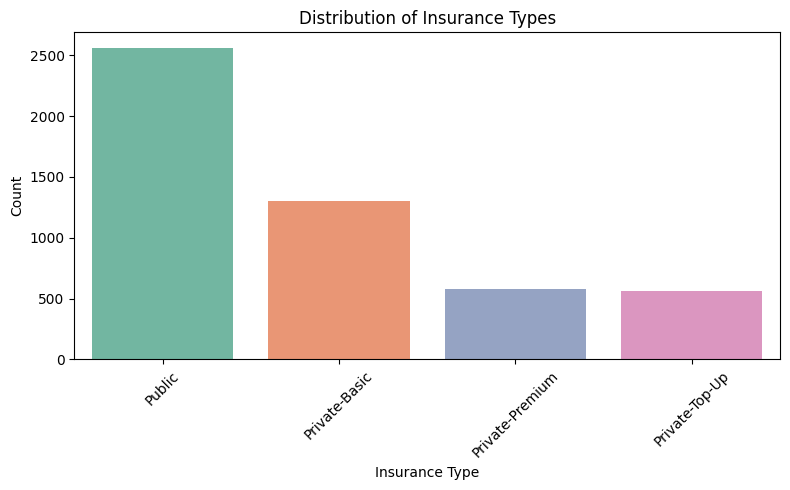

C:\Users\kaoth\AppData\Local\Temp\ipykernel_27456\2774959581.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=patients_df, x='referral_source', order=patients_df['referral_source'].value_counts().index, palette='Set3')


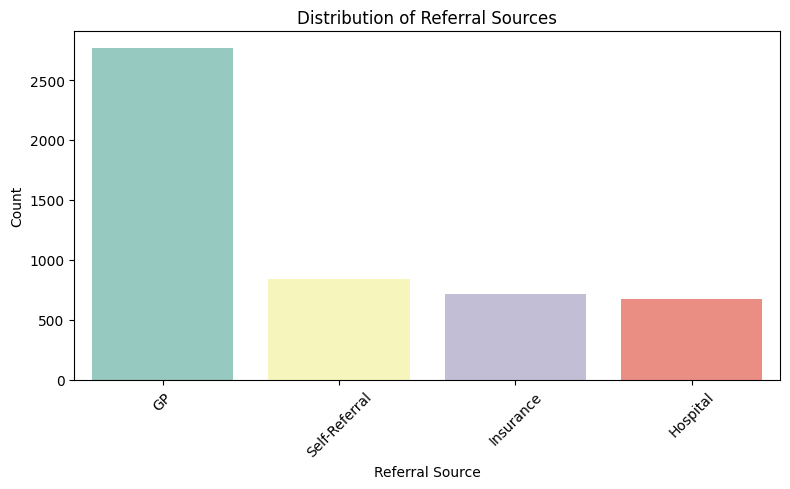

In [36]:
# Insurance Type
plt.figure(figsize=(8, 5))
sns.countplot(data=patients_df, x='insurance_type', order=patients_df['insurance_type'].value_counts().index, palette='Set2')
plt.title("Distribution of Insurance Types")
plt.xlabel("Insurance Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Referral Source
plt.figure(figsize=(8, 5))
sns.countplot(data=patients_df, x='referral_source', order=patients_df['referral_source'].value_counts().index, palette='Set3')
plt.title("Distribution of Referral Sources")
plt.xlabel("Referral Source")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Bivariate Analysis

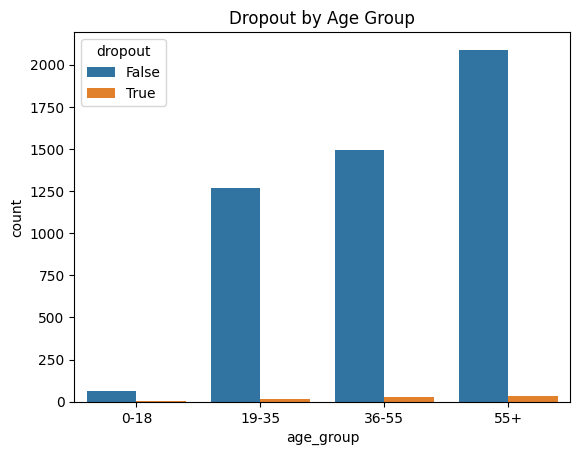

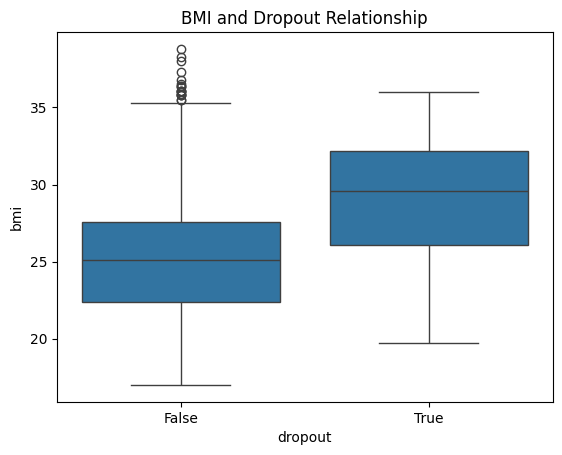

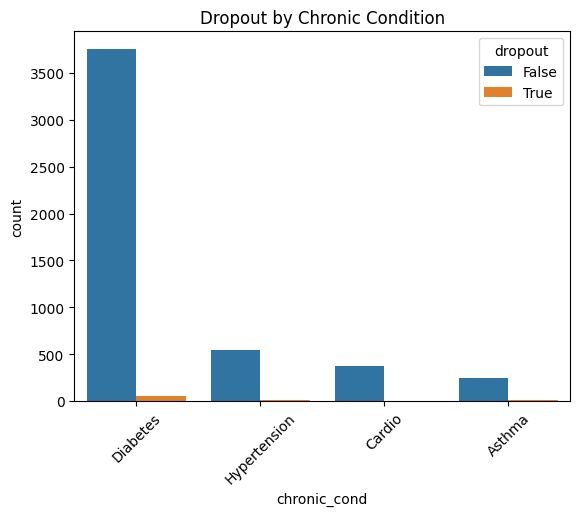

In [37]:
# Understanding Dropout Behavior

patient_dropout = patients_df.merge(dropout_df, on="patient_id", how="left")

# Dropout by Age Group
sns.countplot(data=patient_dropout, x='age_group', hue='dropout')
plt.title("Dropout by Age Group")
plt.show()

# Dropout vs. BMI
sns.boxplot(data=patient_dropout, x='dropout', y='bmi')
plt.title("BMI and Dropout Relationship")
plt.show()

# Dropout by Chronic Condition
sns.countplot(data=patient_dropout, x='chronic_cond', hue='dropout')
plt.xticks(rotation=45)
plt.title("Dropout by Chronic Condition")
plt.show()


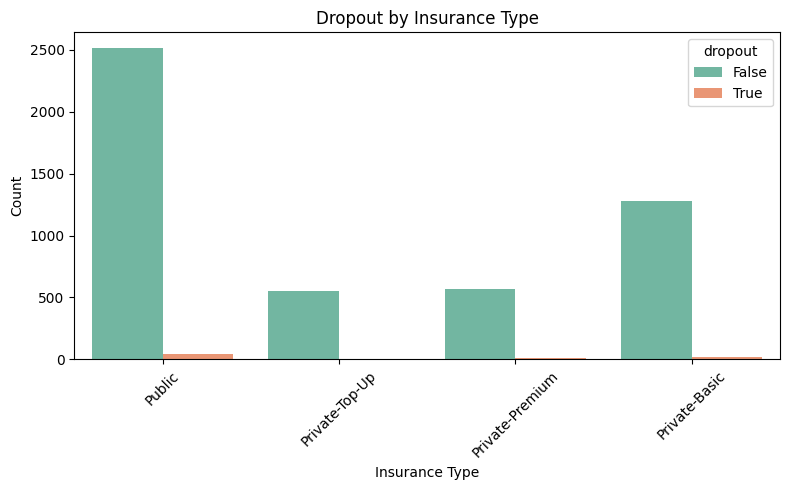

In [38]:
# Dropout by Insurance Type

plt.figure(figsize=(8, 5))
sns.countplot(data=patient_dropout, x='insurance_type', hue='dropout', palette='Set2')
plt.title("Dropout by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


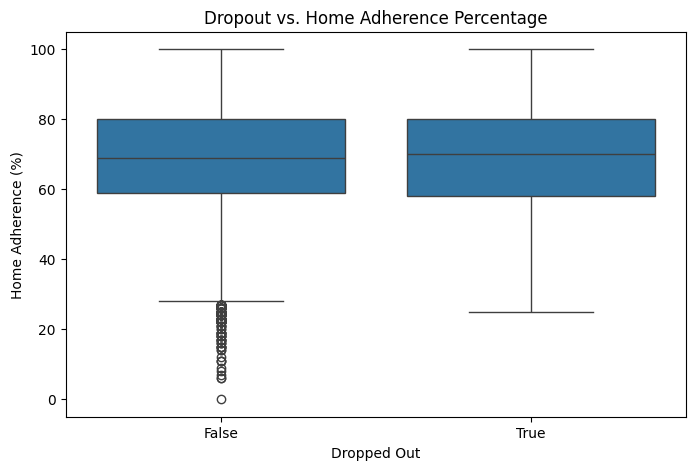

In [39]:
# Merge sessions with dropout info
sessions_dropout = sessions_df.merge(dropout_df, on='patient_id', how='left')


#  Visualize Dropout vs. Home Adherence %
plt.figure(figsize=(8, 5))
sns.boxplot(data=sessions_dropout, x='dropout', y='home_adherence_pc')
plt.title("Dropout vs. Home Adherence Percentage")
plt.xlabel("Dropped Out")
plt.ylabel("Home Adherence (%)")
plt.show()


# H. CORRELATION ANALYSIS

#### H-1 TASK 6 (Correlation Analysis)

-  Correlation Analysis (dentify relationships between variables that may help in predictive modeling)
- Correlation Matrix to understand feature dependencies.
- Heatmap for visual representation of correlations.

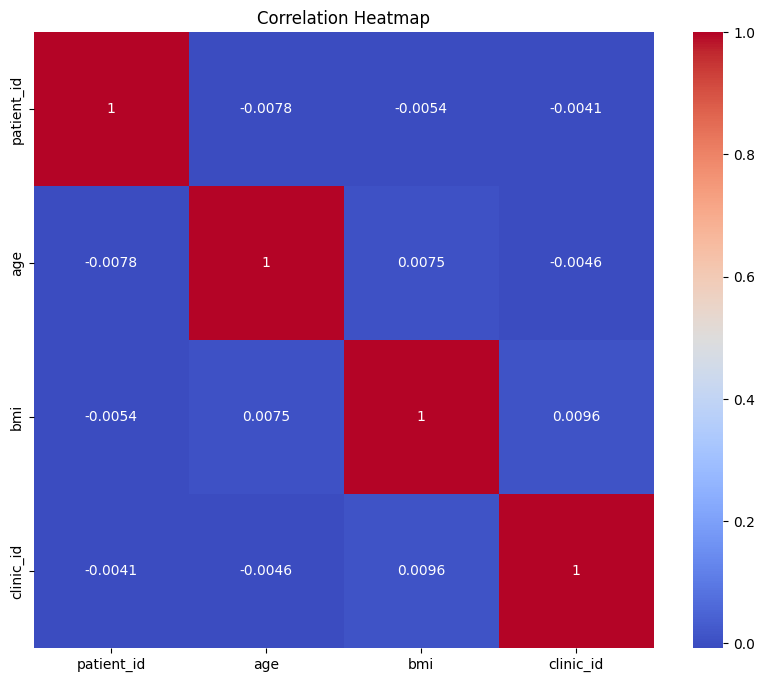

In [40]:
numerics = patients_df.select_dtypes(include=['float64', 'int64'])
corr = numerics.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
